PyTorch Fashion(风格)

1、prepare dataset

2、design model using Class  # 目的是为了前向传播forward，即计算y hat(预测值)

3、Construct loss and optimizer (using PyTorch API) 其中，计算loss是为了进行反向传播，optimizer是为了更新梯度。

4、Training cycle (forward,backward,update)

代码说明：

1、Module实现了魔法函数__call__()，call()里面有一条语句是要调用forward()。因此新写的类中需要重写forward()覆盖掉父类中的forward()

2、call函数的另一个作用是可以直接在对象后面加()，例如实例化的model对象，和实例化的linear对象

3、本算法的forward体现是通过以下语句实现的：

    y_pred = model(x_data)

由于魔法函数call的实现,model(x_data)将会调用model.forward(x_data)函数，model.forward(x_data)函数中的

    y_pred = self.linear(x)

self.linear(x)也由于魔法函数call的实现将会调用torch.nn.Linear类中的forward，至此完成封装，也就是说forward最终是在torch.nn.Linear类中实现的，具体怎么实现，可以不用关心，大概就是y= wx + b。

关于魔法函数call在PyTorch中的应用的进一步解释：  
    pytorch 之 __call__, __init__,forward:   https://blog.csdn.net/xxboy61/article/details/88101192
    pytorch系列nn.Modlue中call的进一步解释:  https://blog.csdn.net/dss_dssssd/article/details/82977170

4、本算法的反向传播，计算梯度是通过以下语句实现的：

    loss.backward() # 反向传播，计算梯度

5、本算法的参数(w,b)更新，是通过以下语句实现的：

    optimizer.step() # update 参数，即更新w和b的值

6、 每一次epoch的训练过程，总结就是

    ①前向传播，求y hat （输入的预测值）

    ②根据y_hat和y_label(y_data)计算loss

    ③反向传播 backward (计算梯度)

    ④根据梯度，更新参数

7、本实例是批量数据处理，不要被optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)误导了，以为见了SGD就是随机梯度下降。要看传进来的数据是单个的还是批量的。这里的x_data是3个数据，是一个batch，调用的PyTorch API是 torch.optim.SGD，但这里的SGD不是随机梯度下降，而是批量梯度下降。也就是说，梯度下降算法使用的是随机梯度下降，还是批量梯度下降，还是mini-batch梯度下降，用的API都是 torch.optim.SGD。

8、torch.nn.MSELoss也跟torch.nn.Module有关，参与计算图的构建，torch.optim.SGD与torch.nn.Module无关，不参与构建计算图

9、torch.nn.Linear的pytorch文档：  https://pytorch.org/docs/1.7.0/generated/torch.nn.Linear.html#torch.nn.Linear

In [9]:
import torch
# prepare dataset
# x,y是矩阵，3行1列 也就是说总共有3个 数据 ，每个数据只有1个 特征 
x_data = torch.tensor([[1.0], [2.0], [3.0]])
y_data = torch.tensor([[2.0], [4.0], [6.0]])
 
#design model using class
"""
our model class should be inherit from nn.Module, which is base class for all neural network modules.
member methods __init__() and forward() have to be implemented
class nn.linear contain two member Tensors: weight and bias
class nn.Linear has implemented the magic method __call__(),which enable the instance of the class can
be called just like a function.Normally the forward() will be called 
"""
class LinearModel(torch.nn.Module):
    def __init__(self):
        super(LinearModel, self).__init__()
        # (1,1)是指输入x和输出y的特征维度，这里数据集中的x和y的特征都是1维的
        # 该线性层需要学习的参数是w和b  获取w/b的方式分别是~linear.weight/linear.bias
        self.linear = torch.nn.Linear(1, 1)
 
    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred
 
model = LinearModel()
 
# construct loss and optimizer
# criterion = torch.nn.MSELoss(size_average = False)
criterion = torch.nn.MSELoss(reduction = 'sum')
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01) # model.parameters()自动完成参数的初始化操作
 
# training cycle forward, backward, update
loss_list,epochs = [],[]
for epoch in range(100):
    y_pred = model(x_data) # forward:predict
    loss = criterion(y_pred, y_data) # forward: loss
    print(epoch, loss.item())#loss 是图，取标量值需要调用 '.item()'这个函数 
    loss_list.append(loss.item())
    epochs.append(epoch)
 
    optimizer.zero_grad() # the grad computer by .backward() will be accumulated. so before backward, remember set the grad to zero
    loss.backward() # backward: autograd，自动计算梯度
    optimizer.step() # update 参数，即更新w和b的值
 
print('w = ', model.linear.weight.item())
print('b = ', model.linear.bias.item())
 
x_test = torch.tensor([[4.0]])
y_test = model(x_test)
print('y_pred = ', y_test.data)

0 119.46044158935547
1 53.34696960449219
2 23.912738800048828
3 10.807097434997559
4 4.970510005950928
5 2.369936227798462
6 1.209975242614746
7 0.6913661956787109
8 0.4583015739917755
9 0.3523845672607422
10 0.3031010031700134
11 0.2790601849555969
12 0.2662862241268158
13 0.25855809450149536
14 0.2531054615974426
15 0.24869489669799805
16 0.24477636814117432
17 0.24110554158687592
18 0.23757228255271912
19 0.23412762582302094
20 0.23074935376644135
21 0.22742699086666107
22 0.22415605187416077
23 0.22093339264392853
24 0.21775750815868378
25 0.21462774276733398
26 0.21154338121414185
27 0.20850269496440887
28 0.20550644397735596
29 0.20255301892757416
30 0.19964176416397095
31 0.19677287340164185
32 0.19394470751285553
33 0.19115769863128662
34 0.1884101927280426
35 0.18570244312286377
36 0.1830337941646576
37 0.18040335178375244
38 0.17781034111976624
39 0.1752549409866333
40 0.17273622751235962
41 0.17025409638881683
42 0.1678069829940796
43 0.16539543867111206
44 0.163018316030502

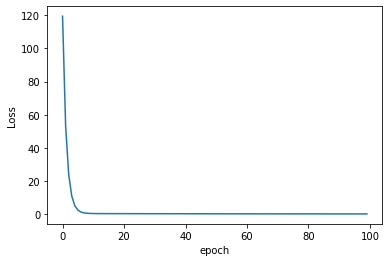

In [10]:
import matplotlib.pyplot as plt
plt.plot(epochs,loss_list)
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.show() 

### 课后作业，换优化器看loss图变化，可选优化器：Adagrad，Adam， Adamax， ASGD， RMSprop， Rprop， SGD

In [34]:
dir(torch.optim)

['ASGD',
 'Adadelta',
 'Adagrad',
 'Adam',
 'AdamW',
 'Adamax',
 'LBFGS',
 'Optimizer',
 'RMSprop',
 'Rprop',
 'SGD',
 'SparseAdam',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_functional',
 '_multi_tensor',
 'lr_scheduler',
 'swa_utils']

## Adagrad    lr = 0.02   epochs=10000

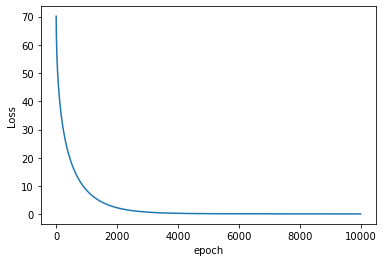

In [30]:
import torch
# prepare dataset
# x,y是矩阵，3行1列 也就是说总共有3个 数据 ，每个数据只有1个 特征 
x_data = torch.tensor([[1.0], [2.0], [3.0]])
y_data = torch.tensor([[2.0], [4.0], [6.0]])
 
#design model using class
"""
our model class should be inherit from nn.Module, which is base class for all neural network modules.
member methods __init__() and forward() have to be implemented
class nn.linear contain two member Tensors: weight and bias
class nn.Linear has implemented the magic method __call__(),which enable the instance of the class can
be called just like a function.Normally the forward() will be called 
"""
class LinearModel(torch.nn.Module):
    def __init__(self):
        super(LinearModel, self).__init__()
        # (1,1)是指输入x和输出y的特征维度，这里数据集中的x和y的特征都是1维的
        # 该线性层需要学习的参数是w和b  获取w/b的方式分别是~linear.weight/linear.bias
        self.linear = torch.nn.Linear(1, 1)
 
    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred
 
model = LinearModel()
# construct loss and optimizer
# criterion = torch.nn.MSELoss(size_average = False)
criterion = torch.nn.MSELoss(reduction = 'sum')
optimizer = torch.optim.Adagrad(model.parameters(), lr = 0.02) # model.parameters()自动完成参数的初始化操作
 
# training cycle forward, backward, update
loss_list,epochs = [],[]
for epoch in range(10000):
    y_pred = model(x_data) # forward:predict
    loss = criterion(y_pred, y_data) # forward: loss
    #print(epoch, loss.item())#loss 是图，取标量值需要调用 '.item()'这个函数 
    loss_list.append(loss.item())
    epochs.append(epoch)
 
    optimizer.zero_grad() # the grad computer by .backward() will be accumulated. so before backward, remember set the grad to zero
    loss.backward() # backward: autograd，自动计算梯度
    optimizer.step() # update 参数，即更新w和b的值
 
#print('w = ', model.linear.weight.item())
#print('b = ', model.linear.bias.item())
 
x_test = torch.tensor([[4.0]])
y_test = model(x_test)
#print('y_pred = ', y_test.data)

plt.plot(epochs,loss_list)
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.show() 

## Adam    lr = 0.1  epochs=100

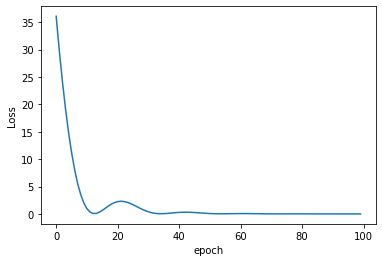

In [25]:
import torch
# prepare dataset
# x,y是矩阵，3行1列 也就是说总共有3个 数据 ，每个数据只有1个 特征 
x_data = torch.tensor([[1.0], [2.0], [3.0]])
y_data = torch.tensor([[2.0], [4.0], [6.0]])
 
#design model using class
"""
our model class should be inherit from nn.Module, which is base class for all neural network modules.
member methods __init__() and forward() have to be implemented
class nn.linear contain two member Tensors: weight and bias
class nn.Linear has implemented the magic method __call__(),which enable the instance of the class can
be called just like a function.Normally the forward() will be called 
"""
class LinearModel(torch.nn.Module):
    def __init__(self):
        super(LinearModel, self).__init__()
        # (1,1)是指输入x和输出y的特征维度，这里数据集中的x和y的特征都是1维的
        # 该线性层需要学习的参数是w和b  获取w/b的方式分别是~linear.weight/linear.bias
        self.linear = torch.nn.Linear(1, 1)
 
    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred
 
model = LinearModel()
 
# construct loss and optimizer
# criterion = torch.nn.MSELoss(size_average = False)
criterion = torch.nn.MSELoss(reduction = 'sum')
optimizer = torch.optim.Adam(model.parameters(), lr = 0.1) # model.parameters()自动完成参数的初始化操作
 
# training cycle forward, backward, update
loss_list,epochs = [],[]
for epoch in range(100):
    y_pred = model(x_data) # forward:predict
    loss = criterion(y_pred, y_data) # forward: loss
    #print(epoch, loss.item())#loss 是图，取标量值需要调用 '.item()'这个函数 
    loss_list.append(loss.item())
    epochs.append(epoch)
 
    optimizer.zero_grad() # the grad computer by .backward() will be accumulated. so before backward, remember set the grad to zero
    loss.backward() # backward: autograd，自动计算梯度
    optimizer.step() # update 参数，即更新w和b的值
 
#print('w = ', model.linear.weight.item())
#print('b = ', model.linear.bias.item())
 
x_test = torch.tensor([[4.0]])
y_test = model(x_test)
#print('y_pred = ', y_test.data)

plt.plot(epochs,loss_list)
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.show()

## Adamax   lr = 0.15 epochs=100

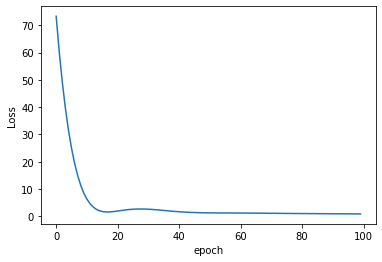

In [39]:
import torch
# prepare dataset
# x,y是矩阵，3行1列 也就是说总共有3个 数据 ，每个数据只有1个 特征 
x_data = torch.tensor([[1.0], [2.0], [3.0]])
y_data = torch.tensor([[2.0], [4.0], [6.0]])
 
#design model using class
"""
our model class should be inherit from nn.Module, which is base class for all neural network modules.
member methods __init__() and forward() have to be implemented
class nn.linear contain two member Tensors: weight and bias
class nn.Linear has implemented the magic method __call__(),which enable the instance of the class can
be called just like a function.Normally the forward() will be called 
"""
class LinearModel(torch.nn.Module):
    def __init__(self):
        super(LinearModel, self).__init__()
        # (1,1)是指输入x和输出y的特征维度，这里数据集中的x和y的特征都是1维的
        # 该线性层需要学习的参数是w和b  获取w/b的方式分别是~linear.weight/linear.bias
        self.linear = torch.nn.Linear(1, 1)
 
    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred
 
model = LinearModel()
 
# construct loss and optimizer
# criterion = torch.nn.MSELoss(size_average = False)
criterion = torch.nn.MSELoss(reduction = 'sum')
optimizer = torch.optim.Adamax(model.parameters(), lr = 0.15) # model.parameters()自动完成参数的初始化操作
 
# training cycle forward, backward, update
loss_list,epochs = [],[]
for epoch in range(100):
    y_pred = model(x_data) # forward:predict
    loss = criterion(y_pred, y_data) # forward: loss
    #print(epoch, loss.item())#loss 是图，取标量值需要调用 '.item()'这个函数 
    loss_list.append(loss.item())
    epochs.append(epoch)
 
    optimizer.zero_grad() # the grad computer by .backward() will be accumulated. so before backward, remember set the grad to zero
    loss.backward() # backward: autograd，自动计算梯度
    optimizer.step() # update 参数，即更新w和b的值
 
#print('w = ', model.linear.weight.item())
#print('b = ', model.linear.bias.item())
 
x_test = torch.tensor([[4.0]])
y_test = model(x_test)
#print('y_pred = ', y_test.data)

plt.plot(epochs,loss_list)
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.show()

## ASGD    lr = 0.001  epochs=100  

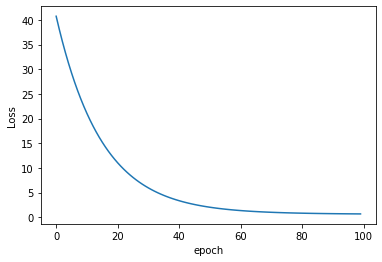

In [42]:
import torch
# prepare dataset
# x,y是矩阵，3行1列 也就是说总共有3个 数据 ，每个数据只有1个 特征 
x_data = torch.tensor([[1.0], [2.0], [3.0]])
y_data = torch.tensor([[2.0], [4.0], [6.0]])
 
#design model using class
"""
our model class should be inherit from nn.Module, which is base class for all neural network modules.
member methods __init__() and forward() have to be implemented
class nn.linear contain two member Tensors: weight and bias
class nn.Linear has implemented the magic method __call__(),which enable the instance of the class can
be called just like a function.Normally the forward() will be called 
"""
class LinearModel(torch.nn.Module):
    def __init__(self):
        super(LinearModel, self).__init__()
        # (1,1)是指输入x和输出y的特征维度，这里数据集中的x和y的特征都是1维的
        # 该线性层需要学习的参数是w和b  获取w/b的方式分别是~linear.weight/linear.bias
        self.linear = torch.nn.Linear(1, 1)
 
    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred
 
model = LinearModel()
 
# construct loss and optimizer
# criterion = torch.nn.MSELoss(size_average = False)
criterion = torch.nn.MSELoss(reduction = 'sum')
optimizer = torch.optim.ASGD(model.parameters(), lr = 0.001) # model.parameters()自动完成参数的初始化操作
 
# training cycle forward, backward, update
loss_list,epochs = [],[]
for epoch in range(100):
    y_pred = model(x_data) # forward:predict
    loss = criterion(y_pred, y_data) # forward: loss
    #print(epoch, loss.item())#loss 是图，取标量值需要调用 '.item()'这个函数 
    loss_list.append(loss.item())
    epochs.append(epoch)
 
    optimizer.zero_grad() # the grad computer by .backward() will be accumulated. so before backward, remember set the grad to zero
    loss.backward() # backward: autograd，自动计算梯度
    optimizer.step() # update 参数，即更新w和b的值
 
#print('w = ', model.linear.weight.item())
#print('b = ', model.linear.bias.item())
 
x_test = torch.tensor([[4.0]])
y_test = model(x_test)
#print('y_pred = ', y_test.data)

plt.plot(epochs,loss_list)
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.show()

## ASGD (当lr=0.15时)

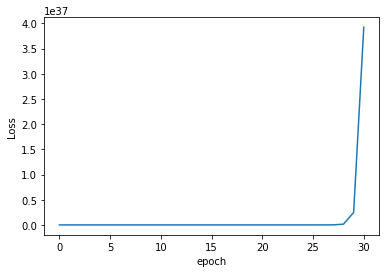

In [47]:
import torch
# prepare dataset
# x,y是矩阵，3行1列 也就是说总共有3个 数据 ，每个数据只有1个 特征 
x_data = torch.tensor([[1.0], [2.0], [3.0]])
y_data = torch.tensor([[2.0], [4.0], [6.0]])
 
#design model using class
"""
our model class should be inherit from nn.Module, which is base class for all neural network modules.
member methods __init__() and forward() have to be implemented
class nn.linear contain two member Tensors: weight and bias
class nn.Linear has implemented the magic method __call__(),which enable the instance of the class can
be called just like a function.Normally the forward() will be called 
"""
class LinearModel(torch.nn.Module):
    def __init__(self):
        super(LinearModel, self).__init__()
        # (1,1)是指输入x和输出y的特征维度，这里数据集中的x和y的特征都是1维的
        # 该线性层需要学习的参数是w和b  获取w/b的方式分别是~linear.weight/linear.bias
        self.linear = torch.nn.Linear(1, 1)
 
    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred
 
model = LinearModel()
 
# construct loss and optimizer
# criterion = torch.nn.MSELoss(size_average = False)
criterion = torch.nn.MSELoss(reduction = 'sum')
optimizer = torch.optim.ASGD(model.parameters(), lr = 0.15) # model.parameters()自动完成参数的初始化操作
 
# training cycle forward, backward, update
loss_list,epochs = [],[]
for epoch in range(100):
    y_pred = model(x_data) # forward:predict
    loss = criterion(y_pred, y_data) # forward: loss
    #print(epoch, loss.item())#loss 是图，取标量值需要调用 '.item()'这个函数 
    loss_list.append(loss.item())
    epochs.append(epoch)
 
    optimizer.zero_grad() # the grad computer by .backward() will be accumulated. so before backward, remember set the grad to zero
    loss.backward() # backward: autograd，自动计算梯度
    optimizer.step() # update 参数，即更新w和b的值
 
#print('w = ', model.linear.weight.item())
#print('b = ', model.linear.bias.item())
 
x_test = torch.tensor([[4.0]])
y_test = model(x_test)
#print('y_pred = ', y_test.data)

plt.plot(epochs,loss_list)
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.show()

## RMSprop  lr = 0.015    epochs=100

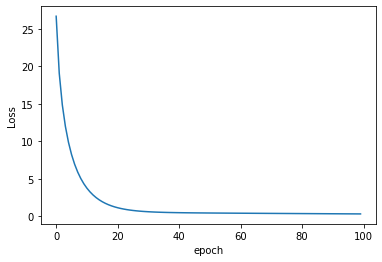

In [49]:
import torch
# prepare dataset
# x,y是矩阵，3行1列 也就是说总共有3个 数据 ，每个数据只有1个 特征 
x_data = torch.tensor([[1.0], [2.0], [3.0]])
y_data = torch.tensor([[2.0], [4.0], [6.0]])
 
#design model using class
"""
our model class should be inherit from nn.Module, which is base class for all neural network modules.
member methods __init__() and forward() have to be implemented
class nn.linear contain two member Tensors: weight and bias
class nn.Linear has implemented the magic method __call__(),which enable the instance of the class can
be called just like a function.Normally the forward() will be called 
"""
class LinearModel(torch.nn.Module):
    def __init__(self):
        super(LinearModel, self).__init__()
        # (1,1)是指输入x和输出y的特征维度，这里数据集中的x和y的特征都是1维的
        # 该线性层需要学习的参数是w和b  获取w/b的方式分别是~linear.weight/linear.bias
        self.linear = torch.nn.Linear(1, 1)
 
    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred
 
model = LinearModel()
 
# construct loss and optimizer
# criterion = torch.nn.MSELoss(size_average = False)
criterion = torch.nn.MSELoss(reduction = 'sum')
optimizer = torch.optim.RMSprop(model.parameters(), lr = 0.015) # model.parameters()自动完成参数的初始化操作
 
# training cycle forward, backward, update
loss_list,epochs = [],[]
for epoch in range(100):
    y_pred = model(x_data) # forward:predict
    loss = criterion(y_pred, y_data) # forward: loss
    #print(epoch, loss.item())#loss 是图，取标量值需要调用 '.item()'这个函数 
    loss_list.append(loss.item())
    epochs.append(epoch)
 
    optimizer.zero_grad() # the grad computer by .backward() will be accumulated. so before backward, remember set the grad to zero
    loss.backward() # backward: autograd，自动计算梯度
    optimizer.step() # update 参数，即更新w和b的值
 
#print('w = ', model.linear.weight.item())
#print('b = ', model.linear.bias.item())
 
x_test = torch.tensor([[4.0]])
y_test = model(x_test)
#print('y_pred = ', y_test.data)

plt.plot(epochs,loss_list)
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.show()

## Rprop   lr = 0.00015   epochs=100

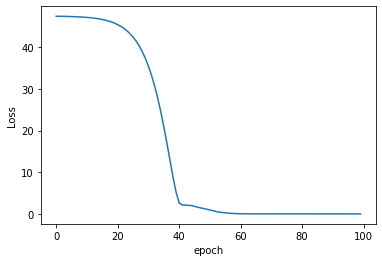

In [53]:
import torch
# prepare dataset
# x,y是矩阵，3行1列 也就是说总共有3个 数据 ，每个数据只有1个 特征 
x_data = torch.tensor([[1.0], [2.0], [3.0]])
y_data = torch.tensor([[2.0], [4.0], [6.0]])
 
#design model using class
"""
our model class should be inherit from nn.Module, which is base class for all neural network modules.
member methods __init__() and forward() have to be implemented
class nn.linear contain two member Tensors: weight and bias
class nn.Linear has implemented the magic method __call__(),which enable the instance of the class can
be called just like a function.Normally the forward() will be called 
"""
class LinearModel(torch.nn.Module):
    def __init__(self):
        super(LinearModel, self).__init__()
        # (1,1)是指输入x和输出y的特征维度，这里数据集中的x和y的特征都是1维的
        # 该线性层需要学习的参数是w和b  获取w/b的方式分别是~linear.weight/linear.bias
        self.linear = torch.nn.Linear(1, 1)
 
    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred
 
model = LinearModel()
 
# construct loss and optimizer
# criterion = torch.nn.MSELoss(size_average = False)
criterion = torch.nn.MSELoss(reduction = 'sum')
optimizer = torch.optim.Rprop(model.parameters(), lr = 0.00015) # model.parameters()自动完成参数的初始化操作
 
# training cycle forward, backward, update
loss_list,epochs = [],[]
for epoch in range(100):
    y_pred = model(x_data) # forward:predict
    loss = criterion(y_pred, y_data) # forward: loss
    #print(epoch, loss.item())#loss 是图，取标量值需要调用 '.item()'这个函数 
    loss_list.append(loss.item())
    epochs.append(epoch)
 
    optimizer.zero_grad() # the grad computer by .backward() will be accumulated. so before backward, remember set the grad to zero
    loss.backward() # backward: autograd，自动计算梯度
    optimizer.step() # update 参数，即更新w和b的值
 
#print('w = ', model.linear.weight.item())
#print('b = ', model.linear.bias.item())
 
x_test = torch.tensor([[4.0]])
y_test = model(x_test)
#print('y_pred = ', y_test.data)

plt.plot(epochs,loss_list)
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.show()